<a href="https://colab.research.google.com/github/GiselePicech/ProcesamientoPesquero/blob/main/Pesquera_DEFINITIVO_Fianl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Librerías

In [90]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.utils.fixes import sklearn
from sklearn.preprocessing import OrdinalEncoder
from pandas.plotting import autocorrelation_plot
import datetime as dt
from datetime import datetime
import statsmodels as sm 
import statsmodels.api as sm_api
from statsmodels.tsa.stattools import adfuller
from numpy import log

## Base de Datos

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
#Ingesta de datos
pesca2 = pd.read_excel('/content/drive/MyDrive/SMyS/maestro_produccion_total.xlsx')

In [93]:
#Muestra de datos
pesca2.head()

,Fecha,RInt,Dueño2,Especie2,Materia Prima,Cajones,PesoXcajon,KgBr,Desp,KgN,ProductoTerminado,IAC,KGT,Rinde
0,2022-07-22,5504.0,17.0,Almeja,Almeja entera fresca,41.0,46.8,1918.8,0.0,1918.8,Almeja 1/2 valva IQF,1432.0,842.0,0.4388
1,2022-08-12,5549.0,10.0,Almeja,Almeja entera fresca,53.0,48.8,2586.4,0.0,2586.4,Almeja 1/2 valva IQF,1438.0,216.0,0.0835
2,2022-05-01,5331.0,6.0,Almeja,Almeja entera fresca,10.0,45.0,450.0,0.0,450.0,Almeja entera fresca,1.0,450.0,1.0000
3,2022-03-28,5240.0,14.0,Almeja,Almeja entera fresca,4.0,40.0,160.0,0.0,160.0,Almeja entera fresca,1.0,160.0,1.0000
4,2022-04-07,5262.0,11.0,Almeja,Almeja entera fresca,7.0,40.0,280.0,0.0,280.0,Almeja entera fresca,1.0,280.0,1.0000


In [94]:
#Tipos de datos
pesca2.dtypes

Fecha                datetime64[ns]
RInt                        float64
Dueño2                      float64
Especie2                     object
Materia Prima                object
Cajones                     float64
PesoXcajon                  float64
KgBr                        float64
Desp                        float64
KgN                         float64
ProductoTerminado            object
IAC                         float64
KGT                         float64
Rinde                       float64
dtype: object

In [95]:
#Cantidad de registros y columnas
pesca2.shape

(4118, 14)

In [96]:
pesca1 = pesca2.drop("RInt", axis=1)

In [97]:
pesca = pesca1.drop("IAC", axis=1)

In [98]:
#Cantidad de registros y columnas
pesca.shape

(4118, 12)

In [99]:
#Medidas generales
pesca.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Fecha,Dueño2,Especie2,Materia Prima,Cajones,PesoXcajon,KgBr,Desp,KgN,ProductoTerminado,KGT,Rinde
count,4118,4118.000000,4118,4118,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118,4118.000000,4118.000000
unique,920,NaN,33,102,NaN,NaN,NaN,NaN,NaN,228,NaN,NaN
top,2021-08-01 00:00:00,NaN,Langostino,Langostino entero fresco,NaN,NaN,NaN,NaN,NaN,Vieira callo IQF,NaN,NaN
freq,23,NaN,1883,1766,NaN,NaN,NaN,NaN,NaN,470,NaN,NaN
first,2018-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-09-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,22.594949,NaN,NaN,201.985673,22.862285,3961.977734,0.044529,3888.203497,NaN,914.492865,0.376811
std,NaN,14.509755,NaN,NaN,233.504160,7.959118,4330.330733,0.085727,4349.494952,NaN,1258.111659,0.339411
min,NaN,1.000000,NaN,NaN,1.000000,4.000000,4.000000,0.000000,4.000000,NaN,3.200000,0.000800
25%,NaN,10.000000,NaN,NaN,31.000000,17.402500,800.200000,0.000000,722.400000,NaN,180.000000,0.146300


In [100]:
#Control de valores nulos
pesca.isna().sum()

Fecha                0
Dueño2               0
Especie2             0
Materia Prima        0
Cajones              0
PesoXcajon           0
KgBr                 0
Desp                 0
KgN                  0
ProductoTerminado    0
KGT                  0
Rinde                0
dtype: int64

In [101]:
#Cantidad de valores unicos por rango
pesca.nunique()

Fecha                 920
Dueño2                 54
Especie2               33
Materia Prima         102
Cajones               474
PesoXcajon            659
KgBr                 2057
Desp                   50
KgN                  2299
ProductoTerminado     228
KGT                  1184
Rinde                2657
dtype: int64

In [102]:
#Matriz de correlacion - Metodo Pearson
pescaD = pesca.drop("Dueño2", axis=1)
pesca_df2=pd.DataFrame(pescaD)
pesca_df2.corr(method = 'pearson')

,Cajones,PesoXcajon,KgBr,Desp,KgN,KGT,Rinde
Cajones,1.000000,-0.352995,0.970215,-0.325306,0.972422,0.583397,-0.364579
PesoXcajon,-0.352995,1.000000,-0.227727,0.529348,-0.245478,-0.160218,-0.055068
KgBr,0.970215,-0.227727,1.000000,-0.276000,0.999087,0.608381,-0.379767
Desp,-0.325306,0.529348,-0.276000,1.000000,-0.308554,-0.231481,-0.146714
KgN,0.972422,-0.245478,0.999087,-0.308554,1.000000,0.609900,-0.373076
KGT,0.583397,-0.160218,0.608381,-0.231481,0.609900,1.000000,0.116096
Rinde,-0.364579,-0.055068,-0.379767,-0.146714,-0.373076,0.116096,1.000000


## Gráficos

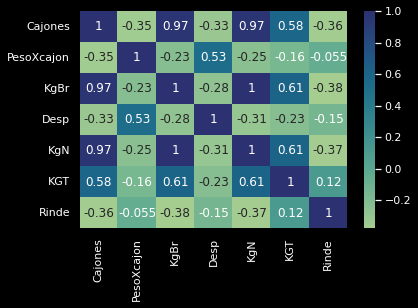

In [103]:
#Matriz de correlacion - Metodo Pearson VISUALIZACION
plt.style.use('dark_background')
sns.heatmap(pescaD.corr(), annot=True, cmap="crest")
plt.show()

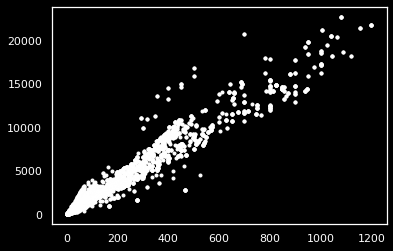

In [104]:
#Grafico de puntos - Cantidad de cajones vs. Kg Netos
plt.style.use('dark_background')
plt.scatter(pesca.Cajones , pesca.KgN, marker=".",facecolor='w')
plt.grid(False)
plt.show()

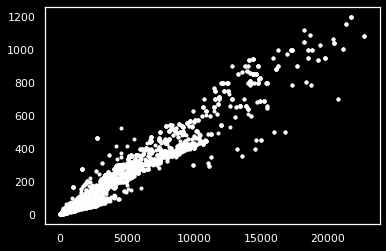

In [105]:
#Grafico de puntos - KG Brutos vs. Cantidad de Cajones
plt.style.use('dark_background')
plt.scatter(pesca.KgBr ,pesca.Cajones, marker=".",facecolor='w')
plt.grid(False)
plt.show()

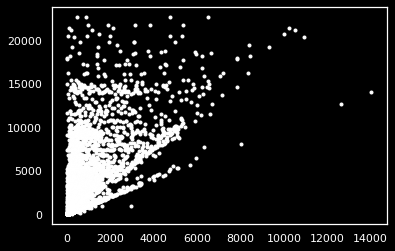

In [106]:
#Grafico de puntos - KG Terminados vs. Kg Netos
plt.style.use('dark_background')
plt.scatter(pesca.KGT,pesca.KgN, marker=".",facecolor='w')
plt.grid(False)
plt.show()

In [107]:
#Suma de Rinde por Dueno
pesca[['Dueño2','Rinde']].groupby('Dueño2').sum().sort_values('Rinde', ascending=False)

,Rinde
Dueño2,
10.0,482.4379
43.0,148.0787
18.0,123.9163
16.0,103.3410
6.0,99.0986
34.0,75.7509
19.0,45.4919
30.0,41.3943
5.0,38.8312


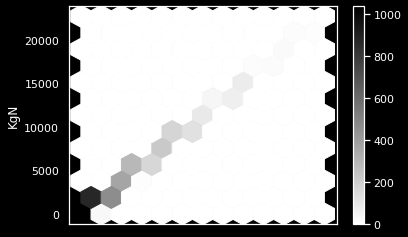

In [108]:
#Grafico de hexagonos - KG Brutos vs. Kg Netos
plt.style.use('dark_background')
pesca.plot.hexbin(x='KgBr', y='KgN', gridsize=12,cmap="gist_yarg")
plt.grid(False)
plt.show()

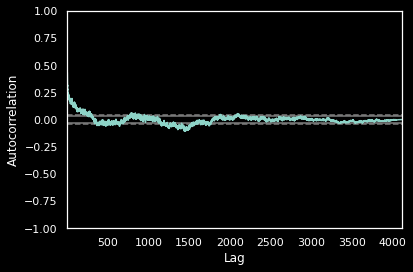

In [109]:
#Grafico de Autocorrelacion - Desperdicio
plt.style.use('dark_background')
autocorrelation_plot(pesca.Desp)
plt.grid(False)
plt.show()

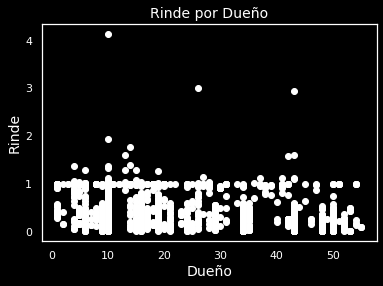

In [110]:
#Grafico de puntos - Duenos vs. Rinde
df = pd.DataFrame(pesca,columns=['Dueño2','Rinde'])
plt.style.use('dark_background')
plt.scatter(df['Dueño2'], df['Rinde'], color='w', marker='o')
plt.title('Rinde por Dueño', fontsize=14)
plt.xlabel('Dueño', fontsize=14)
plt.ylabel('Rinde', fontsize=14)
plt.grid(False)
plt.show()

In [111]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


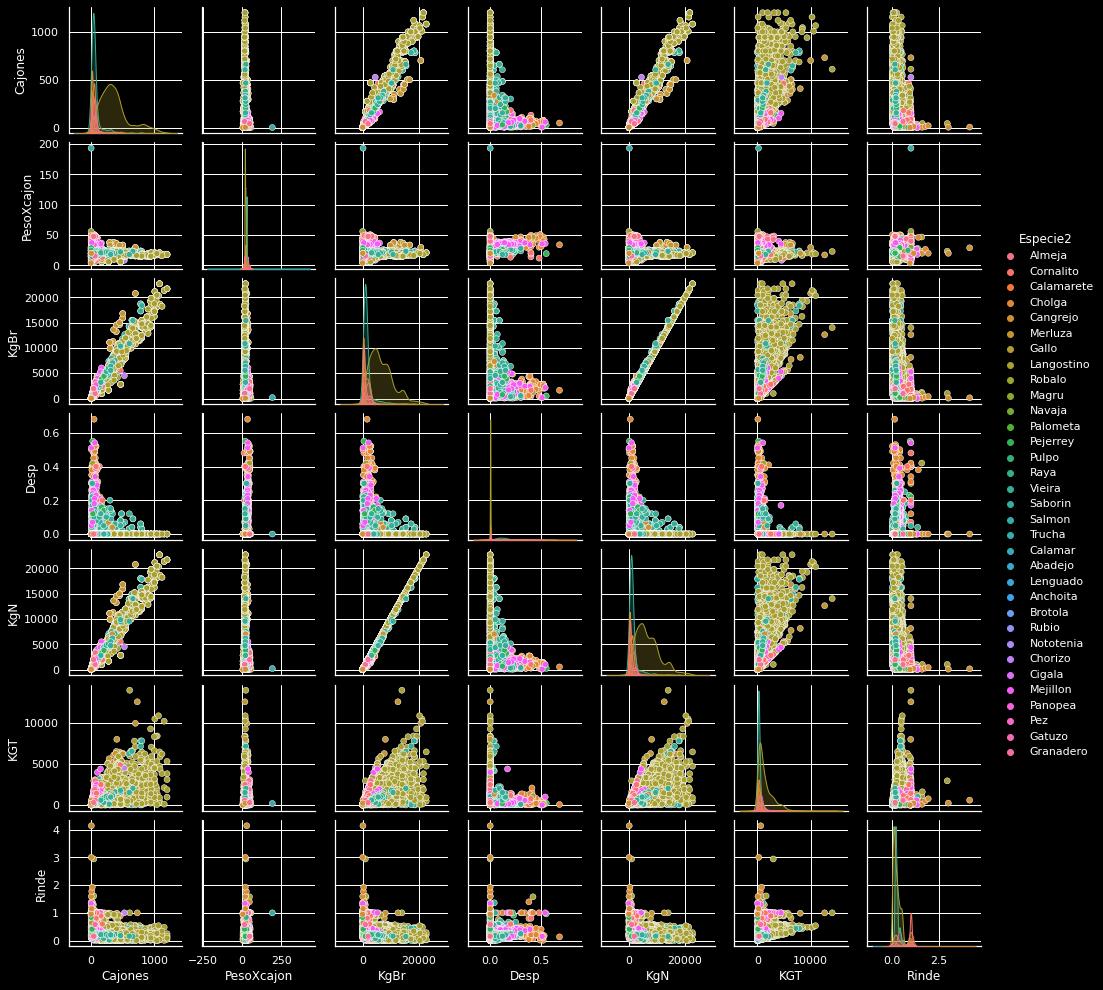

In [112]:
plt.style.use('dark_background')
sns.pairplot(pescaD, hue="Especie2", size=2)
#plt.grid(False)
plt.show()

## Selección de datos

In [113]:
especies = pesca[['Especie2','KGT']].groupby('Especie2').sum().sort_values('KGT',ascending=False)

In [114]:
#Filtro las especies por ranking de SumKGT > 15.000
dfEspecies = pd.DataFrame(especies)
especies_maxpesos = dfEspecies['KGT']>=15000
filtro_dfEspecies = dfEspecies[especies_maxpesos]
print(filtro_dfEspecies)

                   KGT
Especie2              
Langostino  2709476.18
Vieira       313694.20
Mejillon     157711.98
Merluza      157613.20
Cornalito    142021.00
Cholga       112852.45
Cangrejo      63803.91
Almeja        48419.70
Pejerrey      15325.00


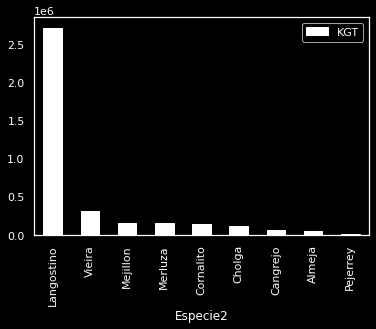

In [115]:
plt.style.use('dark_background')
filtro_dfEspecies.plot(kind='bar',facecolor='w',grid=False)

In [116]:
especiesKgN = pesca[['Especie2','KgN']].groupby('Especie2').sum().sort_values('KgN',ascending=False)
#Filtro las especies por ranking de SumKgN > 50.000
dfEspeciesKgN = pd.DataFrame(especiesKgN)
especies_maxpesosKgN = dfEspeciesKgN['KgN']>=50000
filtro_dfEspeciesKgN = dfEspeciesKgN[especies_maxpesosKgN]
print(filtro_dfEspeciesKgN)

                   KgN
Especie2              
Langostino  12898832.6
Vieira       1434869.3
Merluza       469856.4
Mejillon      352755.2
Cholga        300321.6
Cornalito     153069.8
Almeja        150586.7
Cangrejo       74390.6
Abadejo        61884.7


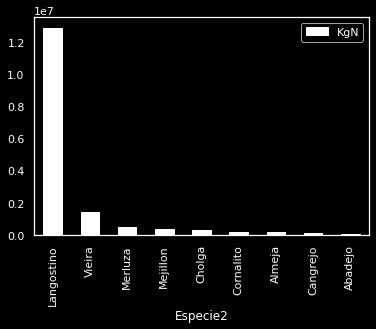

In [117]:
plt.style.use('dark_background')
filtro_dfEspeciesKgN.plot(kind='bar',facecolor='w',grid=False)

In [118]:
especiesB = pesca[['Especie2','Rinde']].groupby('Especie2').sum().sort_values('Rinde',ascending=False)

In [119]:
#Filtro las especies por ranking de SumRinde > 20
dfEspeciesB = pd.DataFrame(especiesB)
especiesB_maxrinde = dfEspeciesB['Rinde']>=20
filtro_dfEspeciesB = dfEspeciesB[especiesB_maxrinde]
print(filtro_dfEspeciesB)

               Rinde
Especie2            
Langostino  456.6039
Vieira      219.6476
Cornalito   206.6070
Cangrejo    193.6871
Mejillon    121.9721
Cholga      116.8206
Almeja       49.1189
Merluza      43.0657
Pejerrey     42.3364


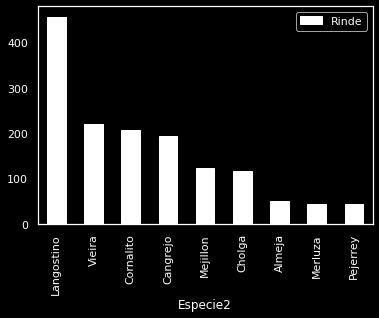

In [120]:
plt.style.use('dark_background')
filtro_dfEspeciesB.plot(kind='bar',facecolor='w',grid=False)

In [121]:
#Creo tabla con especies Top 9 que SumRinde > 20 y SumKGT > 15.000
filtro_dfEspecies = pd.DataFrame(filtro_dfEspecies)
filtro_dfEspeciesB = pd.DataFrame(filtro_dfEspeciesB)
especiesAB = pd.merge(left = filtro_dfEspecies, right = filtro_dfEspeciesB, how = 'inner', left_on = 'Especie2', right_on = 'Especie2')
DFespeciesAB = pd.DataFrame(especiesAB)
especiesAB

,KGT,Rinde
Especie2,,
Langostino,2709476.18,456.6039
Vieira,313694.20,219.6476
Mejillon,157711.98,121.9721
Merluza,157613.20,43.0657
Cornalito,142021.00,206.6070
Cholga,112852.45,116.8206
Cangrejo,63803.91,193.6871
Almeja,48419.70,49.1189
Pejerrey,15325.00,42.3364


In [122]:
especiesKN = pesca[['Especie2','KgN']].groupby('Especie2').sum().sort_values('KgN',ascending=False)

In [123]:
#Filtro las especies por ranking de SumKgN > 50.000
dfEspeciesKN = pd.DataFrame(especiesKN)
especies_maxpesosKN = dfEspeciesKN['KgN']>=50000
filtro_dfEspeciesKN = dfEspeciesKN[especies_maxpesosKN]
print(filtro_dfEspeciesKN)

                   KgN
Especie2              
Langostino  12898832.6
Vieira       1434869.3
Merluza       469856.4
Mejillon      352755.2
Cholga        300321.6
Cornalito     153069.8
Almeja        150586.7
Cangrejo       74390.6
Abadejo        61884.7


In [124]:
#Creo tabla con especies Top 9 que SumRinde > 20, SumKGT > 15.000 y SumKgN > 50.000
filtro_dfEspeciesKN = pd.DataFrame(filtro_dfEspeciesKN)
especiesABKN = pd.merge(left = DFespeciesAB, right = filtro_dfEspeciesKN, how = 'inner', left_on = 'Especie2', right_on = 'Especie2')
DFespeciesABKN = pd.DataFrame(especiesABKN)
especiesABKN

,KGT,Rinde,KgN
Especie2,,,
Langostino,2709476.18,456.6039,12898832.6
Vieira,313694.20,219.6476,1434869.3
Mejillon,157711.98,121.9721,352755.2
Merluza,157613.20,43.0657,469856.4
Cornalito,142021.00,206.6070,153069.8
Cholga,112852.45,116.8206,300321.6
Cangrejo,63803.91,193.6871,74390.6
Almeja,48419.70,49.1189,150586.7


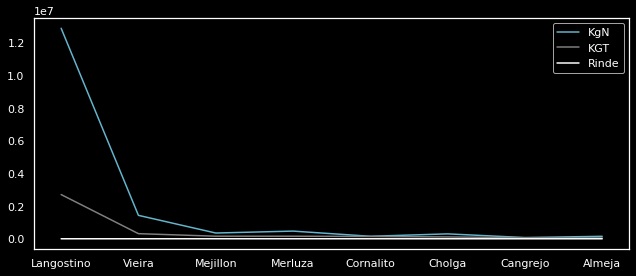

In [125]:
plt.style.use('dark_background')
fig, ax = plt.subplots()
yKGT = especiesABKN['KGT']
zRinde = especiesABKN['Rinde']
wKgN = especiesABKN['KgN']
ax.plot(wKgN, color = 'c',label ="KgN")
ax.plot(yKGT, color = 'tab:grey',label ='KGT')
ax.plot(zRinde, color = 'w',label ='Rinde')
ax.grid(False)
plt.legend()
plt.gcf().set_size_inches(9, 4)
plt.tight_layout()
plt.show()

In [126]:
#Filtro las base por especies (9) que SumKGT > 15.000 y SumRinde > 20
especies_top = especiesAB.index
filtro_TopEsp = pesca_df2[pesca_df2['Especie2'].isin(especies_top)]
filtro_TopEsp.head()

,Fecha,Especie2,Materia Prima,Cajones,PesoXcajon,KgBr,Desp,KgN,ProductoTerminado,KGT,Rinde
0,2022-07-22,Almeja,Almeja entera fresca,41.0,46.8,1918.8,0.0,1918.8,Almeja 1/2 valva IQF,842.0,0.4388
1,2022-08-12,Almeja,Almeja entera fresca,53.0,48.8,2586.4,0.0,2586.4,Almeja 1/2 valva IQF,216.0,0.0835
2,2022-05-01,Almeja,Almeja entera fresca,10.0,45.0,450.0,0.0,450.0,Almeja entera fresca,450.0,1.0000
3,2022-03-28,Almeja,Almeja entera fresca,4.0,40.0,160.0,0.0,160.0,Almeja entera fresca,160.0,1.0000
4,2022-04-07,Almeja,Almeja entera fresca,7.0,40.0,280.0,0.0,280.0,Almeja entera fresca,280.0,1.0000


In [127]:
filtro_TopEsp.shape

(3971, 11)

In [128]:
#Fitro de Especie "LANGOSTINO"
filtro_Lang = pesca_df2[pesca_df2['Especie2']=='Langostino']
filtro_Lang.head()

,Fecha,Especie2,Materia Prima,Cajones,PesoXcajon,KgBr,Desp,KgN,ProductoTerminado,KGT,Rinde
276,2021-06-17,Langostino,Langostino entero fresco,229.0,18.00,4122.00,0.0,4122.0,Lg. C1 block,516.0,0.1252
277,2022-01-13,Langostino,Langostino entero fresco,381.0,16.40,6248.40,0.0,6248.4,Lg. C1 block,3366.0,0.5387
278,2022-01-13,Langostino,Langostino entero fresco,300.0,18.25,5475.00,0.0,5475.0,Lg. C1 block,2106.0,0.3847
279,2022-01-13,Langostino,Langostino entero fresco,249.0,18.25,4544.25,0.0,4544.3,Lg. C1 block,1854.0,0.4080
280,2022-01-13,Langostino,Langostino entero fresco,421.0,16.88,7106.48,0.0,7106.5,Lg. C1 block,4230.0,0.5952


In [129]:
filtro_Lang.shape

(1883, 11)

In [130]:
langostino9 = filtro_Lang
langostino8 = langostino9.drop("Especie2", axis=1)
langostino7 = langostino8.drop("Materia Prima", axis=1)
langostino6 = langostino7.drop("Cajones", axis=1)
langostino5 = langostino6.drop("PesoXcajon", axis=1)
langostino4 = langostino5.drop("KgBr", axis=1)
langostino3 = langostino4.drop("Desp", axis=1)
langostino2 = langostino3.drop("ProductoTerminado", axis=1)
langostino1 = langostino2.drop("KGT", axis=1)
langostino = langostino1.drop("Rinde", axis=1)
langostino.head()

,Fecha,KgN
276,2021-06-17,4122.0
277,2022-01-13,6248.4
278,2022-01-13,5475.0
279,2022-01-13,4544.3
280,2022-01-13,7106.5


In [131]:
dfLangostino = pd.DataFrame(langostino)
dfLangostino = dfLangostino.sort_values(by='Fecha', ascending=True)
dfLangostino.dtypes
dfLangostino.head(10)

,Fecha,KgN
623,2018-01-02,6983.4
553,2018-01-02,6983.4
610,2018-01-02,6983.4
453,2018-01-02,6983.4
494,2018-01-03,7760.4
1233,2018-01-03,7760.4
491,2018-01-04,8762.2
627,2018-01-05,7938.0
541,2018-01-05,7938.0
495,2018-01-06,7051.8


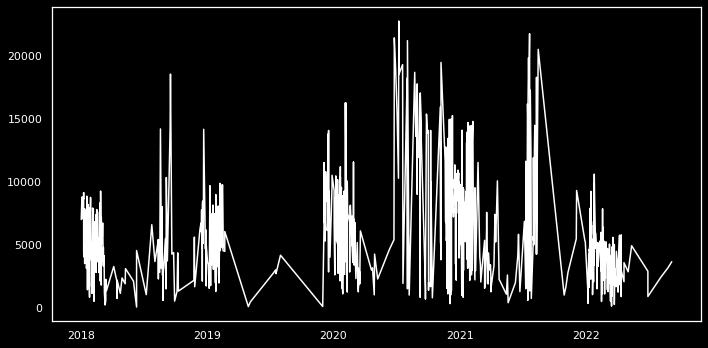

In [132]:
x1 = dfLangostino['Fecha']
y1 = dfLangostino['KgN']
plt.style.use('dark_background')
plt.plot(x1, y1,color = 'w')
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.grid(False)
plt.show()

# **SERIE** **TEMPORAL**

In [133]:
#Prueba de Estacionalidad - Dickey-Fuller
resultadoEsta = adfuller(dfLangostino['KgN'])
print('ADF Statistic: %f' % resultadoEsta[0])
print('p-value: %f' % resultadoEsta[1])

ADF Statistic: -6.458759
p-value: 0.000000


## Es Estacionaria, proque p-value es < 0.05.

In [134]:
serieK = dfLangostino['KgN'].squeeze()
print(serieK)

623     6983.4
553     6983.4
610     6983.4
453     6983.4
494     7760.4
         ...  
3333    2440.0
3357    2440.0
3346    3160.0
3358    3160.0
3171    3646.5
Name: KgN, Length: 1883, dtype: float64


In [135]:
serieF = dfLangostino['Fecha'].squeeze()
print(serieF)

623    2018-01-02
553    2018-01-02
610    2018-01-02
453    2018-01-02
494    2018-01-03
          ...    
3333   2022-08-05
3357   2022-08-05
3346   2022-08-25
3358   2022-08-25
3171   2022-09-05
Name: Fecha, Length: 1883, dtype: datetime64[ns]


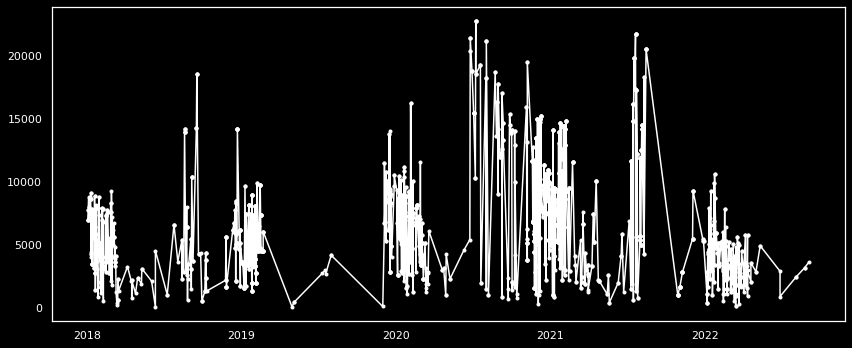

In [136]:
#Visualización de la serie temporal
serieK = dfLangostino['KgN'].squeeze()
xS = dfLangostino['Fecha']
yS = serieK
plt.style.use('dark_background')
plt.plot_date(xS, yS, linestyle='solid',marker='.',color='w')
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.grid(False)
plt.show()

In [137]:
serieK = dfLangostino['KgN'].squeeze()
#Filtro de Hodrick-Prescott para la separación de variables
ciclo, tendencia = sm_api.tsa.filters.hpfilter(serieK)
dfLangostino['ciclo'] = ciclo
dfLangostino['tendencia'] = tendencia

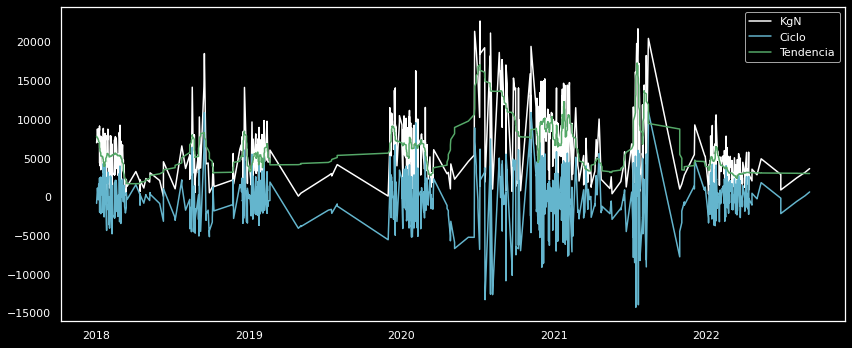

In [157]:
yCT = dfLangostino[['KgN']]
yCT1 = dfLangostino[['ciclo']]
yCT2 = dfLangostino[['tendencia']]

plt.style.use('dark_background')
plt.plot_date(xS, yCT,linestyle='solid', marker=None,color='w', label='KgN')
plt.plot_date(xS, yCT1,linestyle='solid', marker=None,color='c', label='Ciclo')
plt.plot_date(xS, yCT2,linestyle='solid', marker=None,color='g', label='Tendencia')
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.legend()
plt.grid(False)
plt.show()

In [139]:
#Calculo de la media móvil
serieK = dfLangostino['KgN'].squeeze()
MedMov_KgN = serieK.rolling(window=5).mean()
dfLangostino['MedMov_KgN'] = MedMov_KgN
yMV = dfLangostino[['KgN']]
yMV1 = dfLangostino[['MedMov_KgN']]

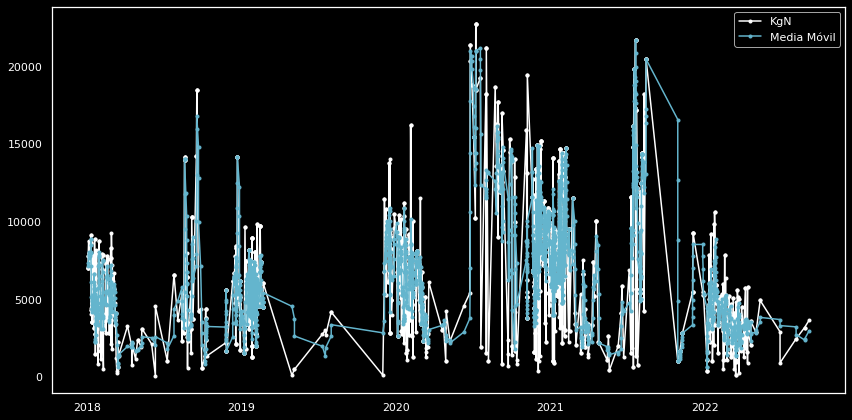

In [140]:
plt.style.use('dark_background')
plt.plot_date(xS, yMV,linestyle='solid', marker='.',color='w', label='KgN')
plt.plot_date(xS, yMV1,linestyle='solid',marker='.', color='c', label='Media Móvil')
plt.gcf().set_size_inches(12, 6)
plt.tight_layout()
plt.legend()
plt.grid(False)
plt.show()

In [141]:
# ARIMA - Modelo
modeloK = sm.tsa.arima_model.ARIMA(serieK, order=(1, 0, 0))
resultadosK = modeloK.fit(disp=-1)  
pronosticoK = resultadosK.fittedvalues
print(resultadosK.summary())

                              ARMA Model Results                              
Dep. Variable:                    KgN   No. Observations:                 1883
Model:                     ARMA(1, 0)   Log Likelihood              -17929.141
Method:                       css-mle   S.D. of innovations           3302.695
Date:                Fri, 18 Nov 2022   AIC                          35864.283
Time:                        14:50:39   BIC                          35880.905
Sample:                             0   HQIC                         35870.405
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6850.1501    222.207     30.828      0.000    6414.632    7285.668
ar.L1.KgN      0.6578      0.017     37.932      0.000       0.624       0.692
                                    Roots           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [142]:
print(pronosticoK)

623     6850.150080
553     6937.805807
610     6937.805807
453     6937.805807
494     6937.805807
           ...     
3333    2930.045407
3357    3949.023291
3346    3949.023291
3358    4422.660526
3171    4422.660526
Length: 1883, dtype: float64


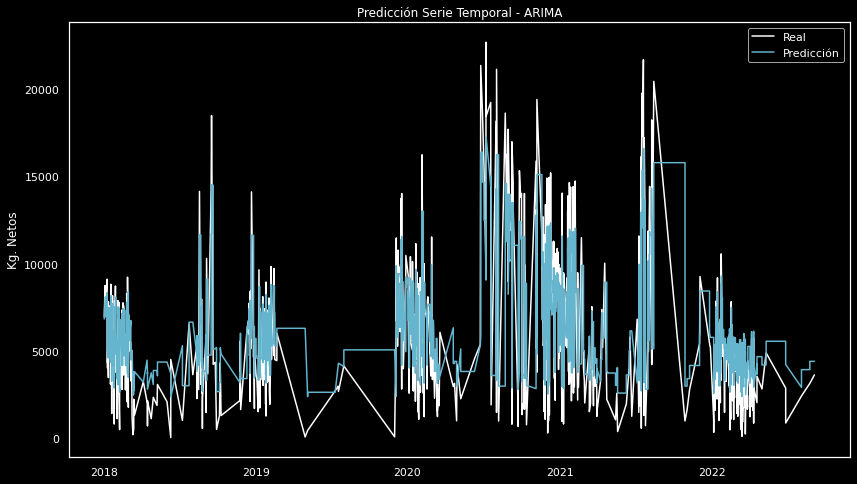

In [143]:
xF = dfLangostino['Fecha']
plt.style.use('dark_background')
plt.figure(figsize=(14,8))
plt.plot(xF,dfLangostino['KgN'],c='w',label='Real')
plt.plot(xF,pronosticoK, c='c', label='Predicción')
plt.ylabel("Kg. Netos")
plt.legend()
plt.title("Predicción Serie Temporal - ARIMA")
plt.grid(False)
plt.show()

### ***AUTO*** ***ARIMA***

In [144]:
#!pip install pmdarima
#from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima

In [145]:
model_auto = auto_arima(serieK, n=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=35701.523, Time=4.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=36196.249, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=35944.232, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=35771.812, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=36194.250, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=35685.986, Time=3.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=35720.570, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=35702.887, Time=0.54 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.65 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=35705.252, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=35695.335, Time=0.79 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=35684.392, Time=4.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=5.19 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=5.69 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   :

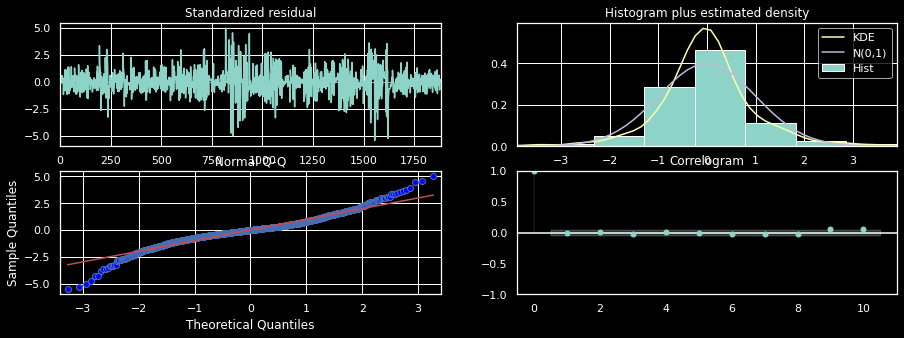

In [146]:
model_auto.plot_diagnostics(figsize=(15,5))
plt.grid(False)
plt.show()

In [147]:
#AUTO ARIMA - Modelo
modeloAUTO = sm.tsa.arima_model.ARIMA(serieK, order=(2,1, 3)) 
resultadosAUTO = modeloAUTO.fit(disp=-1)  
pronosticoAUTO = resultadosAUTO.fittedvalues
print(resultadosAUTO.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/

                             ARIMA Model Results                              
Dep. Variable:                  D.KgN   No. Observations:                 1882
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -17829.601
Method:                       css-mle   S.D. of innovations           3147.413
Date:                Fri, 18 Nov 2022   AIC                          35673.201
Time:                        14:51:30   BIC                          35711.982
Sample:                             1   HQIC                         35687.485
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6375      2.841     -0.224      0.822      -6.206       4.931
ar.L1.D.KgN     1.4514      0.032     44.979      0.000       1.388       1.515
ar.L2.D.KgN    -0.4772      0.029    -16.204    

In [148]:
print(pronosticoAUTO)

553       -0.637458
610       -0.865974
453       -1.050839
494       -1.216550
1233    -380.958825
           ...     
3333    1601.357538
3357     426.533507
3346     471.798642
3358      59.211340
3171     130.226881
Length: 1882, dtype: float64


In [149]:
promedAuto = np.mean(pronosticoAUTO)
pronosticoAUTO = np.append(pronosticoAUTO, promedAuto )
print(pronosticoAUTO)

[ -0.63745836  -0.86597353  -1.0508386  ...  59.21134049 130.22688093
   6.13669988]


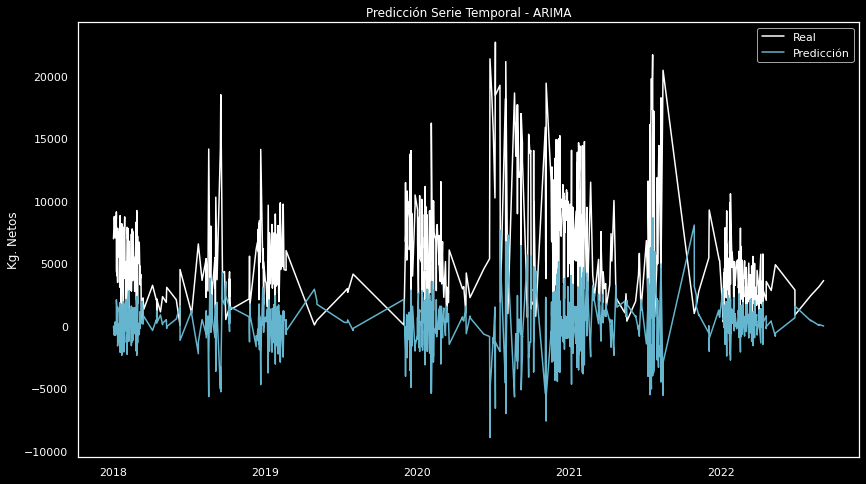

In [150]:
xF = dfLangostino['Fecha']
plt.style.use('dark_background')
plt.figure(figsize=(14,8))
plt.plot(xF,dfLangostino['KgN'],c='w',label='Real')
plt.plot(xF,pronosticoAUTO, c='c', label='Predicción')
plt.ylabel("Kg. Netos")
plt.legend()
plt.title("Predicción Serie Temporal - ARIMA")
plt.grid(False)
plt.show()